In [ ]:
# TODO consistent colors
# TODO create statistics for other columns

In [2]:
print("\033[1mTask 1: Extracting insights from the dataset\033[0m")
print("First, lets visualize the dataset: \n")

import pandas as pd

df = pd.read_csv("TweetSentiment.csv", encoding="ISO-8859-1")[["text", "sentiment"]]
df


Task 1: Extracting insights from the dataset
First, lets visualize the dataset: 



,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [3]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

dfs = {}

for s in df["sentiment"].unique():
    subset = df[df["sentiment"] == s]["text"]
    all_text = " ".join(subset.dropna().astype(str)).lower()
    all_text = all_text.translate(str.maketrans('', '', string.punctuation))
    words = all_text.split()
    words = [word for word in words if word not in stop_words]
    common = Counter(words).most_common(10)
    dfs[s] = pd.DataFrame(common, columns=['word', 'count'])

neutral_top_words = dfs.get("neutral")
negative_top_words = dfs.get("negative")
positive_top_words = dfs.get("positive")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/desjardins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
neutral_top_words

,word,count
0,im,1056
1,get,623
2,go,576
3,day,503
4,dont,491
5,going,479
6,work,477
7,like,457
8,lol,454
9,got,454


In [5]:
negative_top_words

,word,count
0,im,1226
1,like,476
2,dont,469
3,cant,463
4,get,436
5,miss,422
6,go,401
7,sad,389
8,work,386
9,sorry,340


In [6]:
positive_top_words

,word,count
0,day,1223
1,good,1046
2,love,875
3,happy,840
4,im,742
5,mothers,627
6,thanks,553
7,great,478
8,like,413
9,hope,396


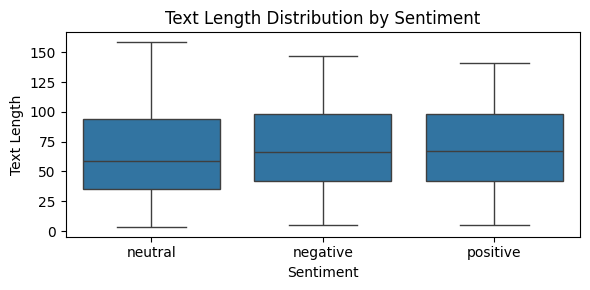

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df["text_len"] = df["text"].str.len()

plt.figure(figsize=(6, 3))
sns.boxplot(x="sentiment", y="text_len", data=df)

plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.tight_layout()
plt.show()


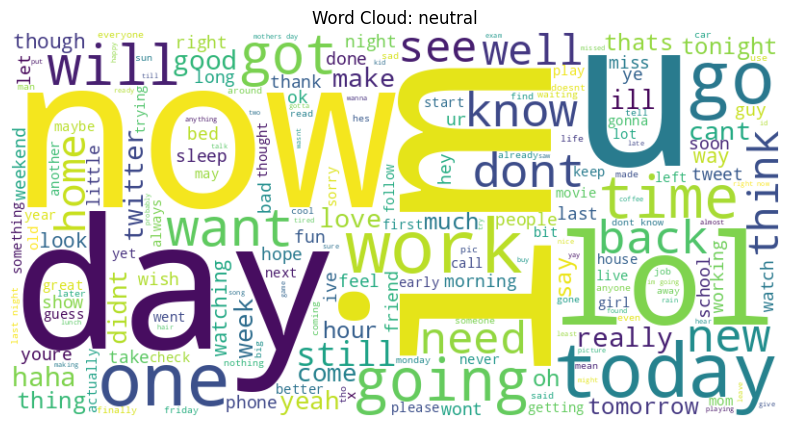

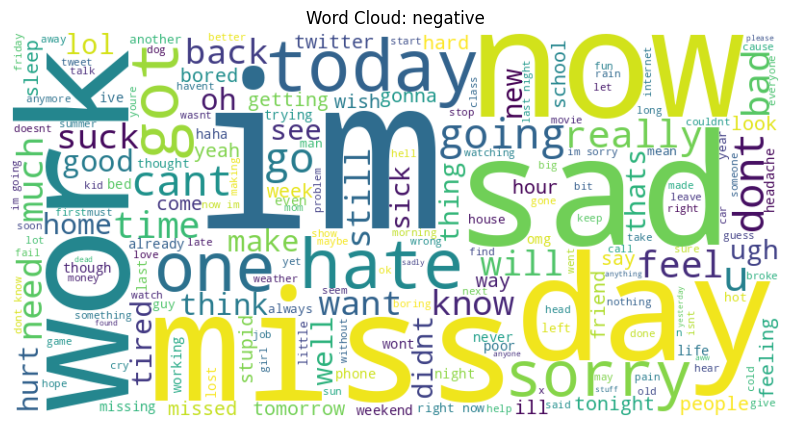

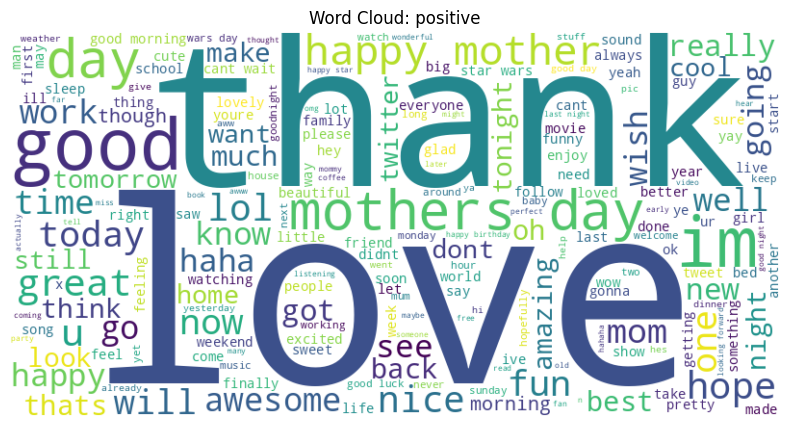

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string

stopwords = set(STOPWORDS)

for sentiment in df["sentiment"].unique():
    subset = df[df["sentiment"] == sentiment]["text"].dropna().astype(str).str.lower()
    all_text = " ".join(subset)
    all_text = all_text.translate(str.maketrans('', '', string.punctuation))
    wc = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(all_text)
    plt.figure(figsize=(10,5))
    plt.title(f"Word Cloud: {sentiment}")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()



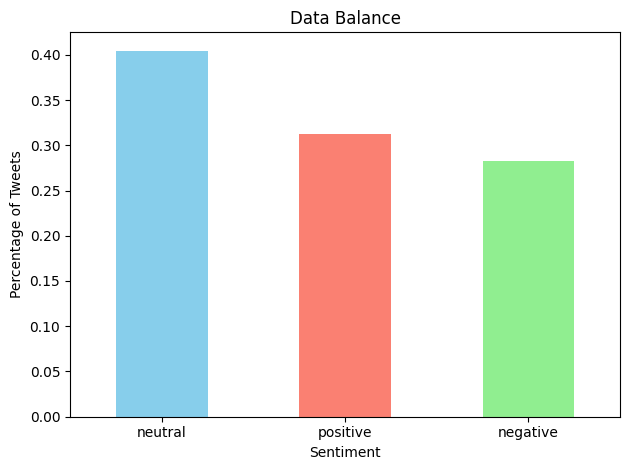

In [9]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts(normalize=True).plot(
    kind="bar", 
    color=["skyblue", "salmon", "lightgreen"]
)

plt.title("Data Balance")
plt.ylabel("Percentage of Tweets")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Computes and ranks bigrams by their TF-IDF scores to identify phrases most characteristic and distinctive for each sentiment category.

results = []

for s in df["sentiment"].unique():
    texts = df[df["sentiment"] == s]["text"].dropna().astype(str)
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(texts)
    tfidf_matrix = vec.transform(texts)
    sums = tfidf_matrix.sum(axis=0)
    tfidf_scores = [(ngram, sums[0, idx]) for ngram, idx in vec.vocabulary_.items()]
    sorted_tfidf = sorted(tfidf_scores, key=lambda x: -x[1])[:10]
    for ngram, score in sorted_tfidf:
        results.append({'sentiment': s, 'bigram': ngram, 'tfidf_score': score})

df_tfidf = pd.DataFrame(results)

neutral_tfidf = df_tfidf[df_tfidf["sentiment"] == "neutral"].reset_index(drop=True)
negative_tfidf = df_tfidf[df_tfidf["sentiment"] == "negative"].reset_index(drop=True)
positive_tfidf = df_tfidf[df_tfidf["sentiment"] == "positive"].reset_index(drop=True)

# many neutral tweets refer to urls often
# typical words for negative/positive sentiment

In [11]:
neutral_tfidf

,sentiment,bigram,tfidf_score
0,neutral,twitpic com,33.744308
1,neutral,http twitpic,33.420619
2,neutral,just got,28.639134
3,neutral,don know,21.831311
4,neutral,http bit,19.613450
5,neutral,bit ly,19.613450
6,neutral,http tinyurl,19.478271
7,neutral,tinyurl com,19.478271
8,neutral,http plurk,14.684703
9,neutral,plurk com,14.684703


In [12]:
negative_tfidf

,sentiment,bigram,tfidf_score
0,negative,feel like,20.626748
1,negative,sorry hear,18.656115
2,negative,just got,16.111602
3,negative,http twitpic,15.733087
4,negative,twitpic com,15.733087
5,negative,don know,13.751335
6,negative,don like,11.027646
7,negative,feel good,10.273857
8,negative,don want,10.096156
9,negative,looks like,9.672703


In [13]:
positive_tfidf

,sentiment,bigram,tfidf_score
0,positive,mother day,88.994627
1,positive,happy mother,82.080404
2,positive,mothers day,70.233276
3,positive,happy mothers,63.181691
4,positive,good morning,50.154546
5,positive,http twitpic,29.378582
6,positive,twitpic com,29.378582
7,positive,star wars,24.680004
8,positive,happy birthday,24.337715
9,positive,wars day,23.624443


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

exclude_phrases = {
    "http twitpic com",
    "http bit ly",
    "http tinyurl com",
    "http plurk com",
    "http blip fm"
}

# Computes and ranks trigrams by their TF-IDF scores to identify phrases most characteristic and distinctive for each sentiment category.

results = []

for s in df["sentiment"].unique():
    texts = df[df["sentiment"] == s]["text"].dropna().astype(str)
    vec = TfidfVectorizer(ngram_range=(3, 3), stop_words='english').fit(texts)
    tfidf_matrix = vec.transform(texts)
    sums = tfidf_matrix.sum(axis=0)
    tfidf_scores = [(ngram, sums[0, idx]) for ngram, idx in vec.vocabulary_.items() if ngram not in exclude_phrases]

    analyzer = vec.build_analyzer()
    all_trigrams = []
    for text in texts:
        tokens = analyzer(text)
        all_trigrams.extend(tokens)
    trigram_counts = Counter(all_trigrams)

    sorted_tfidf = sorted(tfidf_scores, key=lambda x: -x[1])[:10]
    for ngram, score in sorted_tfidf:
        count = trigram_counts.get(ngram, 0)
        results.append({'sentiment': s, 'trigram': ngram, 'tfidf_score': score, 'count': count})

df_tfidf = pd.DataFrame(results)

neutral_trigrams = df_tfidf[df_tfidf["sentiment"] == "neutral"].reset_index(drop=True)
negative_trigrams = df_tfidf[df_tfidf["sentiment"] == "negative"].reset_index(drop=True)
positive_trigrams = df_tfidf[df_tfidf["sentiment"] == "positive"].reset_index(drop=True)

# yfrog is pretty negative connotated website 
# people like star wars ^^
# people dont like britains lol
# having good day is negative too? probably "not having a good day"
# just got home is neutral/negative

In [15]:
neutral_trigrams

,sentiment,trigram,tfidf_score,count
0,neutral,just got home,9.775988,25
1,neutral,work work work,5.058827,8
2,neutral,happy mothers day,4.129430,13
3,neutral,getting ready work,4.091032,7
4,neutral,going star trek,3.587234,5
5,neutral,happy mother day,3.472122,9
6,neutral,www myspace com,3.419786,12
7,neutral,star wars day,3.293300,9
8,neutral,_carter video private,3.000000,3
9,neutral,live http ustre,2.908595,9


In [16]:
negative_trigrams

,sentiment,trigram,tfidf_score,count
0,negative,don feel good,5.717585,11
1,negative,dont feel good,4.042185,6
2,negative,just got home,3.871180,10
3,negative,http yfrog com,3.278198,10
4,negative,having bad day,3.194371,5
5,negative,britains got talent,2.549718,7
6,negative,don wanna work,2.547465,3
7,negative,having good day,2.231200,5
8,negative,teddy chucking time,2.000000,2
9,negative,tried dm following,2.000000,2


In [17]:
positive_trigrams

,sentiment,trigram,tfidf_score,count
0,positive,happy mother day,86.753540,257
1,positive,happy mothers day,68.289724,180
2,positive,star wars day,25.957525,63
3,positive,happy star wars,23.633133,54
4,positive,mother day mothers,13.302170,24
5,positive,mother day moms,12.211081,23
6,positive,mother day mom,9.097609,21
7,positive,wars day 4th,8.779881,18
8,positive,mothers day mom,7.782015,14
9,positive,happy mom day,6.096745,12


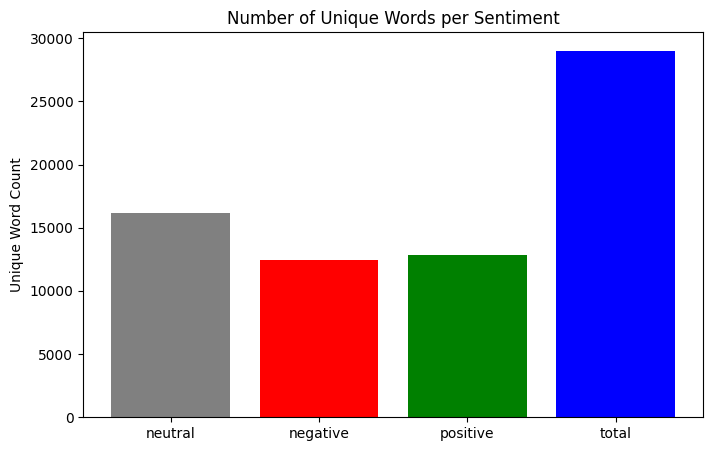

In [18]:
# Counts the number of unique words in each sentiment category except stop words and punctuation

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from collections import defaultdict

stop_words = set(stopwords.words('english'))

unique_words = defaultdict(set)

for s in df["sentiment"].unique():
    texts = df[df["sentiment"] == s]["text"].dropna().astype(str).str.lower()
    texts = texts.str.translate(str.maketrans('', '', string.punctuation))
    words = " ".join(texts).split()
    words = [w for w in words if w not in stop_words]
    unique_words[s] = set(words)

unique_counts = {s: len(words) for s, words in unique_words.items()}
unique_counts["total"] = len(set.union(*unique_words.values()))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(unique_counts.keys(), unique_counts.values(), color=["gray", "red", "green", "blue"])
plt.title("Number of Unique Words per Sentiment")
plt.ylabel("Unique Word Count")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/desjardins/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Figure size 1000x500 with 0 Axes>

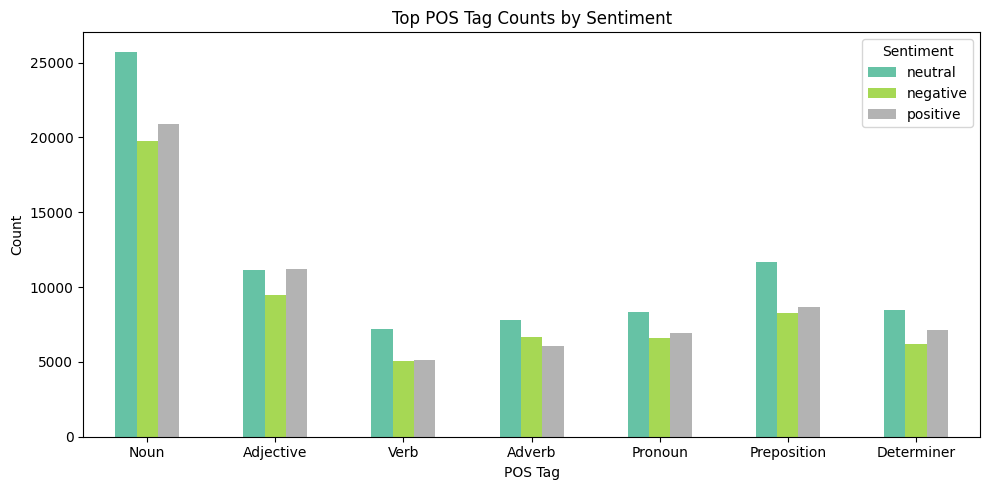

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')

from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

pos_tags_per_sentiment = {}

for s in df["sentiment"].unique():
    texts = df[df["sentiment"] == s]["text"].dropna().astype(str)
    all_words = " ".join(texts).split()
    pos_tags = nltk.pos_tag(all_words)
    tags = [tag for word, tag in pos_tags]
    tag_counts = Counter(tags)
    pos_tags_per_sentiment[s] = tag_counts

top_tags = ['NN', 'JJ', 'VB', 'RB', 'PRP', 'IN', 'DT']

tag_labels = {
    'NN': 'Noun',
    'JJ': 'Adjective',
    'VB': 'Verb',
    'RB': 'Adverb',
    'PRP': 'Pronoun',
    'IN': 'Preposition',
    'DT': 'Determiner'
}

data_filtered = {s: [pos_tags_per_sentiment[s].get(tag, 0) for tag in top_tags] for s in pos_tags_per_sentiment}
df_pos_filtered = pd.DataFrame(data_filtered, index=[tag_labels[t] for t in top_tags])

plt.figure(figsize=(10, 5))
df_pos_filtered.plot(kind='bar', colormap='Set2', figsize=(10,5))
plt.title('Top POS Tag Counts by Sentiment')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()



Topics for sentiment: neutral


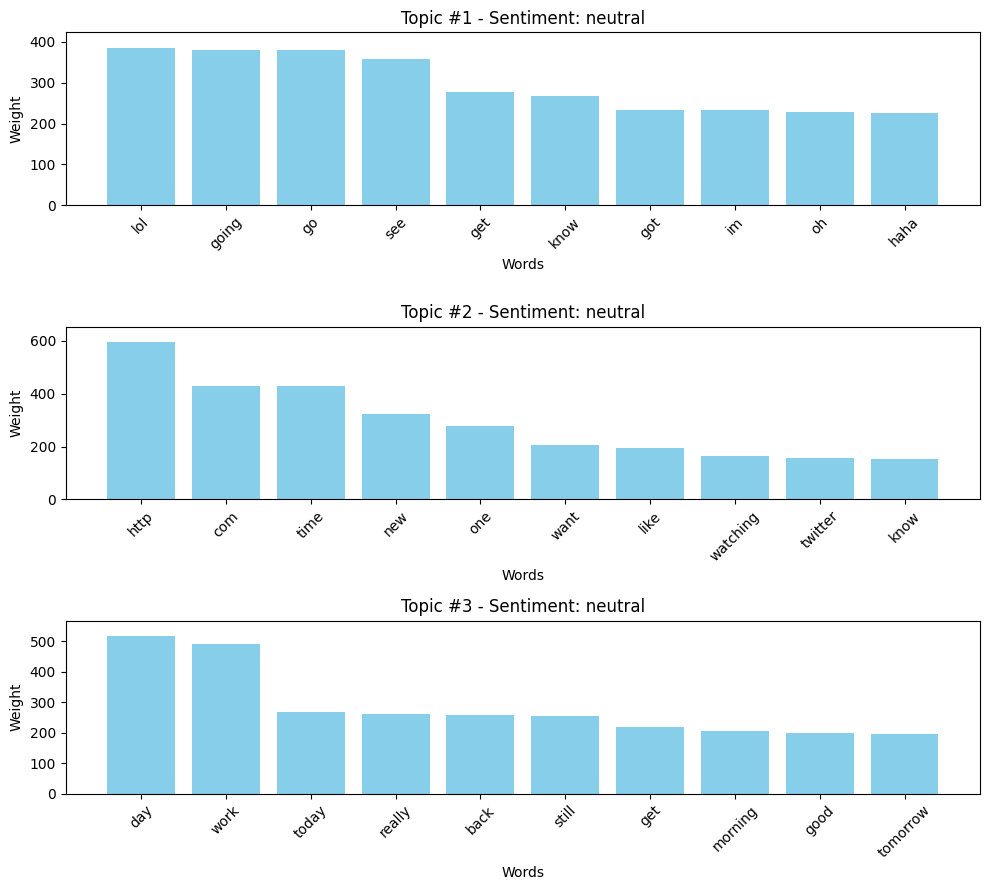


Topics for sentiment: negative


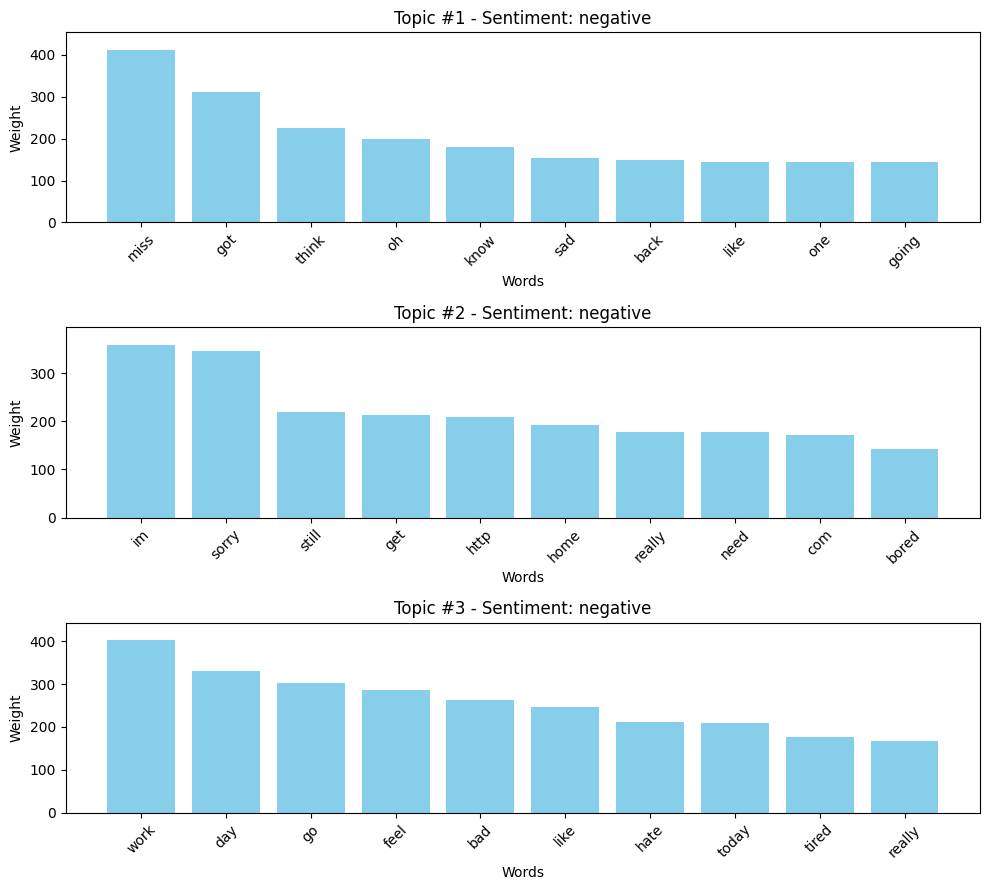


Topics for sentiment: positive


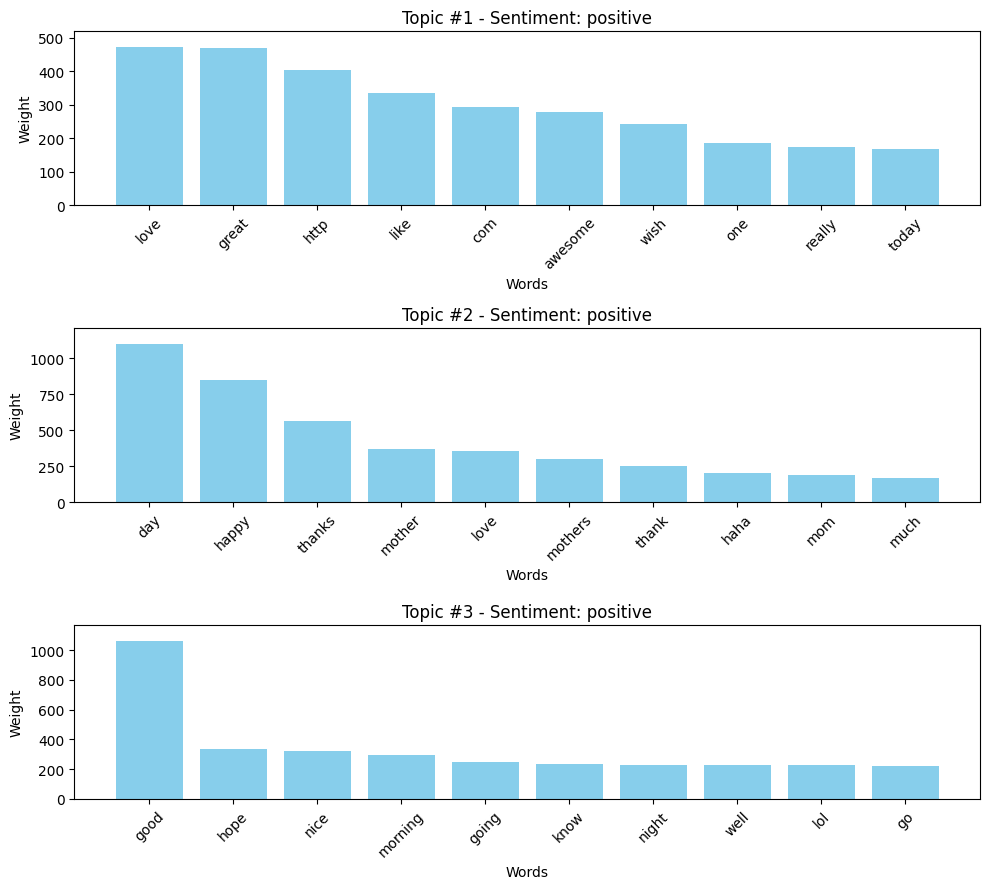

In [20]:
# LDA model discovers the top 3 topics per sentiment and visualizes the top 10 word weights for each topic

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
import io
from contextlib import redirect_stdout, redirect_stderr

# Download nltk data silently if not present
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    f = io.StringIO()
    with redirect_stdout(f), redirect_stderr(f):
        nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    f = io.StringIO()
    with redirect_stdout(f), redirect_stderr(f):
        nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))

def plot_top_words_per_topic(lda_model, feature_names, n_top_words=10, sentiment=None):
    n_topics = lda_model.n_components
    fig, axes = plt.subplots(n_topics, 1, figsize=(10, n_topics * 3), sharex=False)
    
    if n_topics == 1:
        axes = [axes]  # make iterable
    
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[::-1][:n_top_words]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]
        
        ax = axes[topic_idx]
        ax.bar(top_words, top_weights, color='skyblue')
        ax.set_title(f'Topic #{topic_idx + 1}' + (f' - Sentiment: {sentiment}' if sentiment else ''))
        ax.set_ylabel('Weight')
        ax.set_xlabel('Words')
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, max(top_weights) * 1.1)  # consistent y limits
    
    plt.tight_layout()
    plt.show()

results = {}

for sentiment in df['sentiment'].unique():
    texts = df[df['sentiment'] == sentiment]['text'].dropna().astype(str)
    vectorizer = CountVectorizer(stop_words=stop_words, max_features=1000)
    dtm = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=3, random_state=42)
    lda.fit(dtm)

    print(f"\nTopics for sentiment: {sentiment}")
    feature_names = vectorizer.get_feature_names_out()
    plot_top_words_per_topic(lda, feature_names, n_top_words=10, sentiment=sentiment)

    # Store model for later if needed
    results[sentiment] = lda


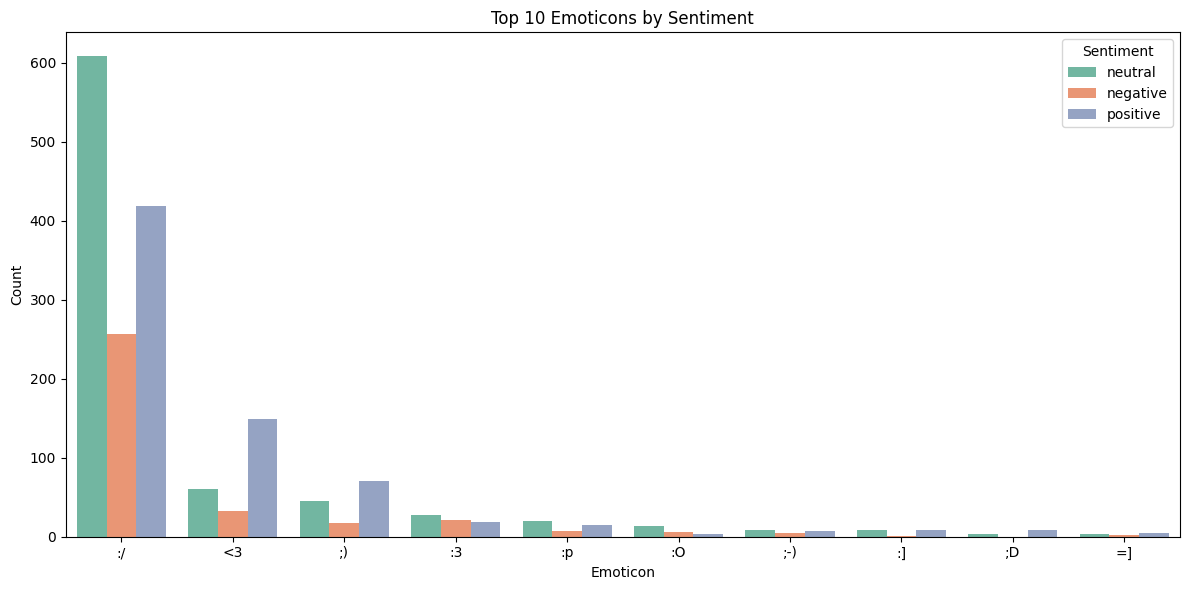

In [21]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

emoticon_pattern = re.compile(r'''
    ([:;=8]         # Eyes
    [-^]?           # Optional nose
    [)D\]pP\(\[/\\OpO3]   # Mouth
    )|
    (<3)|           # Heart
    (:'\()|         # Crying face
    (:'\))          # Tears of joy
''', re.VERBOSE)

sentiment_emoticon_counts = {}

for sentiment in df["sentiment"].unique():
    texts = df[df["sentiment"] == sentiment]["text"].dropna().astype(str)
    all_text = " ".join(texts)
    found_emoticons = emoticon_pattern.findall(all_text)
    emoticons_flat = [item for tup in found_emoticons for item in tup if item]
    counts = Counter(emoticons_flat)
    sentiment_emoticon_counts[sentiment] = counts

# Aggregate counts across sentiments to find overall top 10 emoticons
total_counts = Counter()
for counts in sentiment_emoticon_counts.values():
    total_counts.update(counts)

top_10_emoticons = [em for em, _ in total_counts.most_common(10)]

plot_data = []
for sentiment, counts in sentiment_emoticon_counts.items():
    for emoticon in top_10_emoticons:
        plot_data.append({
            "Sentiment": sentiment,
            "Emoticon": emoticon,
            "Count": counts.get(emoticon, 0)
        })

df_plot = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="Emoticon", y="Count", hue="Sentiment", palette="Set2")
plt.title("Top 10 Emoticons by Sentiment")
plt.ylabel("Count")
plt.xlabel("Emoticon")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


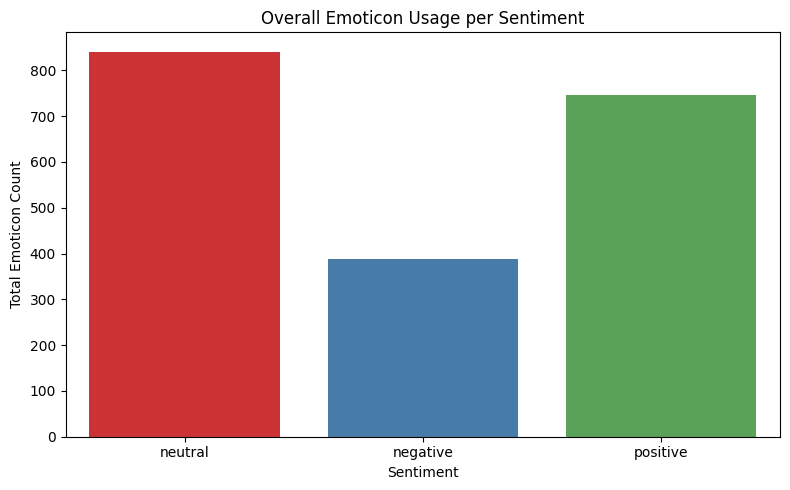

In [22]:
overall_counts = {sentiment: sum(counts.values()) for sentiment, counts in sentiment_emoticon_counts.items()}

df_overall = pd.DataFrame({
    'Sentiment': list(overall_counts.keys()),
    'Total_Emoticons': list(overall_counts.values())
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_overall, x='Sentiment', y='Total_Emoticons', hue='Sentiment', palette='Set1', legend=False)
plt.title('Overall Emoticon Usage per Sentiment')
plt.ylabel('Total Emoticon Count')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

In [3]:
# "but" is filtered out as a stop word, but provides information
df["text"] = df["text"].astype(str).str.lower()
df["contains_but"] = df["text"].str.contains(r"\bbut\b")

percentages = (
    df.groupby("sentiment")["contains_but"]
    .mean()
    .mul(100)
    .round(2)
)

print(percentages)

sentiment
negative    9.09
neutral     9.99
positive    6.13
Name: contains_but, dtype: float64
